In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
data_x, data_y = datasets.load_diabetes(return_X_y = True)
feature_labels = datasets.load_diabetes().feature_names

x_train = data_x[:-20]
x_test = data_x[-20:]

y_train = data_y[:-20]
y_test = data_y[-20:]


In [63]:
x_train.shape
print(feature_labels)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [64]:
print(x_train[:10])
print(y_train[:10])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]
 [-0.09269548 -0.04464164 -0.04069594 -0.01944183 -0.06899065 -0.07928784
   0.04127682 -0.0763945  -0.04117617 -0.09634616]
 [-0.04547248  0.05068012 -0.04716281 -0.01599898 -0.04009564 -0.02480001
   0.00077881 -0.03949338 -0.06291688 -0.03835666]
 [ 0.06350368  0.05068012 -0.00189471  0.06662945  0.09061988  0.10891438
   0.02286863  0.01770335 -0.03581619  0.00306441]


In [65]:
sgdr = SGDRegressor(max_iter = 1000)
sgdr.fit(x_train, y_train)
print("Number of iterations before converge : " , sgdr.n_iter_)

Number of iterations before converge :  1000


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [66]:
w_norm = sgdr.coef_
b_norm = sgdr.intercept_

print("Weights : ", w_norm)
print("Bias : ", b_norm)

Weights :  [  50.87468441  -39.87573191  268.2207741   188.56581879   34.29405251
    7.58587051 -152.14425303  138.62674306  237.4983942   134.89326576]
Bias :  [153.12032432]


In [67]:
y_pred = sgdr.predict(x_test)

In [68]:
print("MSE : ", mean_squared_error(y_test, y_pred))
print("R2 score : ", r2_score(y_test, y_pred))

MSE :  2863.921876457991
R2 score :  0.4071978828153092


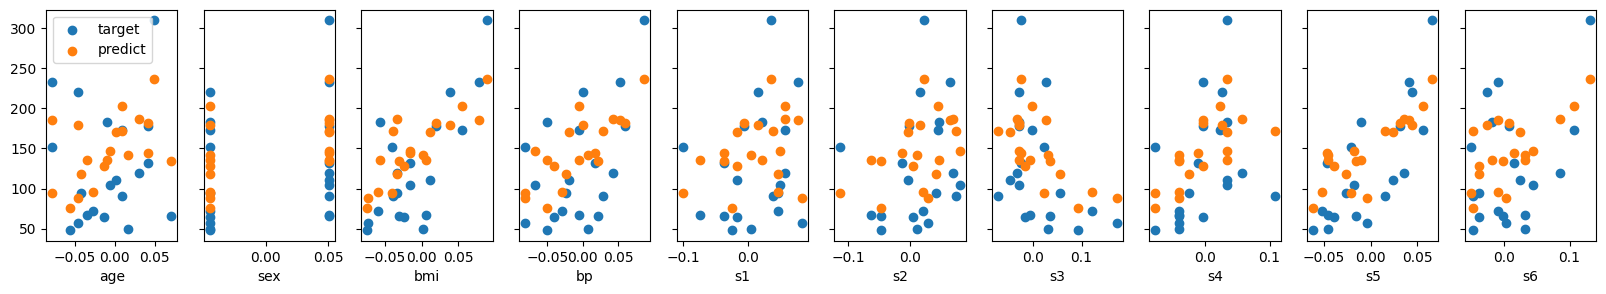

In [69]:
fig,ax=plt.subplots(1,10,figsize=(20,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_test[:,i],y_test, label = 'target')
    ax[i].set_xlabel(feature_labels[i])
    ax[i].scatter(x_test[:,i],y_pred, label = 'predict')
ax[0].legend();
#fig.suptitle("target versus prediction using z-score normalized model")
plt.show()